In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

problem: bagaimana kita memprediksi apakah customer baru memiliki resiko gagal bayar?  
data: apa yg diprediksi? kemungkinan seseorang gagal bayar  
> data apa yg diperlukan? data demografis, data transaksi, income, dll   

tujuan: memaksimalkan keuntungan dari pemberian pinjaman.  
action: jangan memberi pinjaman pada orang yang memiliki resiko gagal bayar  
value: peningkatan profit  

In [2]:
bankloan= pd.read_csv('bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [6]:
fitur=['employ','debtinc','creddebt','othdebt']
target= ['default']

In [7]:
X=bankloan[fitur]
y= bankloan[target]

In [9]:
X.describe()

,employ,debtinc,creddebt,othdebt
count,700.000000,700.000000,700.000000,700.000000
mean,8.388571,10.260571,1.553553,3.058209
std,6.658039,6.827234,2.117197,3.287555
min,0.000000,0.400000,0.011696,0.045584
25%,3.000000,5.000000,0.369059,1.044178
50%,7.000000,8.600000,0.854869,1.987567
75%,12.000000,14.125000,1.901955,3.923065
max,31.000000,41.300000,20.561310,27.033600


## Modeling

In [11]:
sm_logit=sm.Logit(y, sm.add_constant(X))
result=sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.411165
         Iterations 7


In [12]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Thu, 18 Feb 2021   Pseudo R-squ.:                  0.2844
Time:                        19:54:00   Log-Likelihood:                -287.82
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.473e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      0.236     -5.210      0.000      -1.693      -0.767
employ        -0.2436      0.029     -8.456      0.000      -0.300      -0.187
debtinc        0.0885      0.021      4.200      0.0

## Model Intepretation

LLR-Test:  

B1, B2, B3, B4 : P-Value of the Log-Likelihood Ratio is below 0.05. We have enough evidence that minimal either employ, debtinc, creddebt, othdebt have significant effect to credit default rate.  

Wald Test:  
* B0 : P-Value of the partial test is below 0.05. We need B0 in the model  
* B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that employ decrease default rate  
* B2 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that debtinc increase default rate.  
* B3 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that creddebt increase default rate.  
* B3 : P-Value of the partial test is greater than 0.05. With significant level of 5%, we dont have enough evidence that othdebt has significant effect to default rate  

Parameter Estimate:  
* B1 = -0.2436 : Employment decrease default rate. When employment increase one year and no changes in another variable, the risk to become default most likely decrease 1.27 times 
* B2 = 0.0885 : Ratio debt to income increase default rate. When ratio debt to income increase one and no changes in another variable, the risk to become default most likely increase 1.09 times
* B3 = 0.5041 :  creddebt increase default rate. When creddebt increase 5$ and no changes in another variable, the risk to become default most likely increase 12.43 times
* It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:  

Pseudo R-Square = 28.44% : This model can explain 28.33% variation of default rate.  

In [17]:
# feature employ
b= 0.2436 #nilai nimus
np.exp(b)

#ketika employ (lama bekerja) bertambah 1 (tahun) dan tidak ada perubahan pada feature lain, maka peluang untuk default akan TURUN sebanyak 1.275 kali

1.2758338948511923

In [18]:
# feature debtinc
b= 0.0885 #(nilai positif)
np.exp(b)

#ketika debtinc bertambah 1 dan tidak ada perubahan pada feature lain, maka peluang untuk default akan NAIK sebanyak 1.093 kali

1.0925342526104793

In [19]:
#feature creddebt
b= 0.5041 #nilai positif
np.exp(b)

#ketika creddebt bertambah 1 dan tidak ada perubahan pada feature lain, maka peluang untuk default akan NAIK sebanyak 1.655 kali

1.6554949043702933

In [ ]:
# feature othdebt memiliki hasil test partial yg tidak sigfikan. 

## Collinearity

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
def calc_vif(X):

    vif= pd.DataFrame()
    vif['variables']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]

    return vif

In [15]:
calc_vif(X)

,variables,VIF
0,employ,2.222753
1,debtinc,3.045977
2,creddebt,2.816577
3,othdebt,4.116876


no problem with collinearity

## Validation

Ketika melakukan pemodelan menggunakan machine learning, model divalidasi nilai prediksinya menggunakan gugus data yang tidak terlibat sama sekali dalam pemodelan. Data dibagi menjadi dua bagian yaitu data training dan data testing dengan proporsi masing-masing misalkan 70% dan 30%. Gugus data training digunakan untuk membangun model sedangkan gugus data testing untuk validasi.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
X,y

(     employ  debtinc   creddebt   othdebt
 0        17      9.3  11.359392  5.008608
 1        10     17.3   1.362202  4.000798
 2        15      5.5   0.856075  2.168925
 3        15      2.9   2.658720  0.821280
 4         2     17.3   1.787436  3.056564
 ..      ...      ...        ...       ...
 695       6      4.6   0.262062  0.979938
 696       6     11.5   0.369495  2.045505
 697      15      7.6   0.491264  1.940736
 698      19      8.4   2.302608  4.165392
 699      12     14.7   2.994684  3.473316
 
 [700 rows x 4 columns],
      default
 0          1
 1          0
 2          0
 3          0
 4          1
 ..       ...
 695        1
 696        0
 697        0
 698        0
 699        0
 
 [700 rows x 1 columns])

In [22]:
bankloan['default'].value_counts()

0    517
1    183
Name: default, dtype: int64

In [49]:
X_train, X_test, y_train, y_test= train_test_split( 
    X, y,
    stratify = y, #agar ratio kelas di setiap subset data sama 
    test_size=0.2,
    random_state=2020) 

In [50]:
y_train.sum()/y_train.shape[0]

default    0.260714
dtype: float64

In [51]:
y_test.sum()/y_test.shape[0]

default    0.264286
dtype: float64

In [52]:
sm_logit_train= sm.Logit(y_train, sm.add_constant(X_train))
result_train= sm_logit_train.fit()

Optimization terminated successfully.
         Current function value: 0.411145
         Iterations 7


In [53]:
y_predict_proba=result_train.predict(sm.add_constant(X_test))
y_predict_proba #probability seseorang untuk default

118    0.584807
309    0.308932
339    0.308407
686    0.398796
639    0.236440
         ...   
597    0.544007
58     0.012081
467    0.102066
148    0.060111
681    0.214943
Length: 140, dtype: float64

In [56]:
y_predict_class=[1 if i>0.5 else 0 for i in y_predict_proba]
# y_predict_class

In [57]:
print('model accuracy in test dataset: ', accuracy_score(y_test,y_predict_class))

model accuracy in test dataset:  0.8214285714285714


accuracy: 82%, berarti model kita mampu memprediksi dengan benar 8 kali dari 10 kali

In [58]:
df=pd.read_csv('white_wine.csv')

In [59]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


target= quality --> buat kolom target, jika quality> 6, maka 1 selain itu 0; 1= good wine, 0= bad wine

fitur= density dan alkohol (drop nan pada alkohol)

Buatlah model untuk memprediksi kualitas wine dengan menggunakan log regresi. Lakukan validasi untuk melihat seberapa baik performa model yang kamu buat.

In [60]:
df=df.dropna()

In [61]:
X= df[['alcohol','density']]
y=[1 if i>6 else 0 for i in df['quality']]

In [63]:
X_train, X_test, y_train, y_test= train_test_split( 
    X, y,
    stratify = y,
    test_size=0.2,
    random_state=2020) 

In [64]:
sm_logit_train= sm.Logit(y_train, sm.add_constant(X_train))
result_train= sm_logit_train.fit()

Optimization terminated successfully.
         Current function value: 0.091062
         Iterations 13


In [65]:
y_predict_proba=result_train.predict(sm.add_constant(X_test))
y_predict_class=[1 if i>0.5 else 0 for i in y_predict_proba]

In [66]:
accuracy_score(y_test,y_predict_class)

0.9807692307692307

# KNN

In [11]:
wine= pd.read_csv('white_wine.csv')

X= density, alcohol  
y= quality (>6 --> good wine/1)

In [12]:
import seaborn as sns

In [13]:
wine['label']= np.where(wine['quality']>6,1,0)


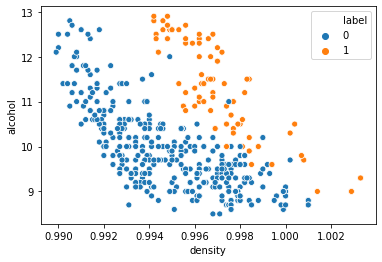

In [14]:
sns.scatterplot(x='density',y='alcohol', data=wine, hue='label' )

In [15]:
wine[['alcohol','density']].isna().sum()

alcohol    1
density    0
dtype: int64

In [16]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)

In [17]:
X= wine[['alcohol','density']]
y=wine['label']

In [18]:
X_train, X_test, y_train,y_test= train_test_split(
    X,y,
    stratify= y,
    test_size=0.2,
    random_state=2020 #agar pembagian data konsisten
)

## modelling without scaling

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn= KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_predict=knn.predict(X_test)
y_predict

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
print('model accuracy score: ', accuracy_score(y_test, y_predict))

model accuracy score:  0.9038461538461539


Accuracy 90%, artinya dari 10 kali prediksi, model kita memprediksi 9 kali benar.

In [86]:
wine[['alcohol','density']]

,alcohol,density
0,8.800000,1.0010
1,9.500000,0.9940
2,10.100000,0.9951
3,9.900000,0.9956
4,9.900000,0.9956
...,...,...
515,10.400000,0.9926
516,9.100000,0.9934
517,10.400000,0.9920
518,10.800000,0.9918


## modelling with scalling

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler= MinMaxScaler()
scaler.fit(X_train) #fitting dengan data train
X_train_scaled= scaler.transform(X_train) 
X_test_scaled= scaler.transform(X_test)

In [26]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train) #model fitting

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_predict=knn.predict(X_test_scaled)

In [28]:
print('model accuracy in test dataset:', accuracy_score(y_test,y_predict))

model accuracy in test dataset: 0.9807692307692307


Dengan scaling ada peningkatan accuracy dari 0.90 menjadi 0.98

## Choose best K

> tips: use odd number

In [30]:
import matplotlib.pyplot as plt

In [36]:
k= range(1,30,2) #1,3,5,7,....29
testing_accuracy=[]
training_accuracy=[]
score=0

for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)

    y_predict_train=knn.predict(X_train_scaled)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))

    y_predict_test= knn.predict(X_test_scaled)
    acc_score= accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)

    if score < acc_score:
        score=acc_score
        best_k=i

In [44]:
X_train

,alcohol,density
325,10.5,0.9946
273,9.0,0.9949
287,9.0,1.0029
342,9.1,0.9962
323,10.4,0.9946
...,...,...
382,9.2,0.9969
426,10.4,0.9954
489,8.9,0.9962
311,12.5,0.9968


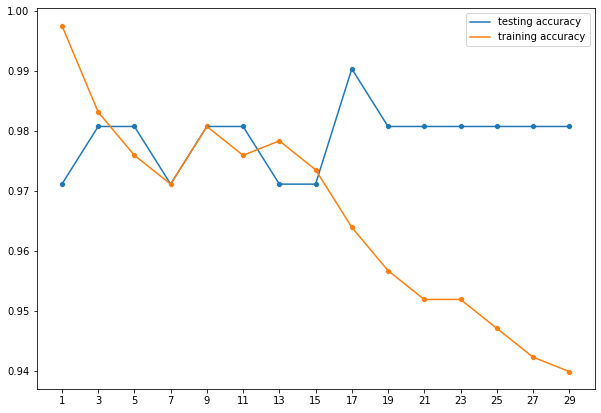

In [41]:
plt.figure(figsize=(10,7))
sns.lineplot(k,testing_accuracy)
sns.scatterplot(k,testing_accuracy)

sns.lineplot(k,training_accuracy)
sns.scatterplot(k,training_accuracy)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k))
plt.show()

In [42]:
print('score:', score, '\nbest k:', best_k)

score: 0.9903846153846154 
best k: 17


Pada dataset wine, nilai k terbaik adalah 17, dengan score akurasi terbaik 99%

latihan:  
Gunakan dataset Titanic  
Buat model KNN untuk memprediksi apakah seseorang akan survive ketika kecelakaan titanic terjadi.   
Carilah nilai K terbaik untuk model yang kamu buat.  
Bandingkan nilai K dan akurasi dengan dan tanpa scaling (gunakan min max scaler)

In [65]:
df=pd.read_csv('titanic.csv')
df

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,13.0000,Second,NaN,Southampton,no,True
887,female,19.0,0,30.0000,First,B,Southampton,yes,True
888,female,NaN,2,23.4500,Third,NaN,Southampton,no,False
889,male,26.0,0,30.0000,First,C,Cherbourg,yes,True


In [66]:
df=df.drop('deck', axis=1)

In [67]:
df.isna().sum()

sex              0
age            177
parch            0
fare             0
class            0
embark_town      2
alive            0
alone            0
dtype: int64

In [68]:
df.age=df.age.fillna(df.age.mean())
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [69]:
df.isna().sum()

sex            0
age            0
parch          0
fare           0
class          0
embark_town    0
alive          0
alone          0
dtype: int64

In [73]:
df['alone']=df['alone'].astype('int')
X=df.drop('alive',axis=1)
y=[1 if i=='yes' else 0 for i in df['alive']]

In [74]:
X=pd.get_dummies(X, drop_first=True)

In [85]:
sns.load_dataset('titanic')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [75]:
X

,age,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,22.000000,0,7.2500,0,1,0,1,0,1
1,38.000000,0,71.2833,0,0,0,0,0,0
2,26.000000,0,7.9250,1,0,0,1,0,1
3,35.000000,0,53.1000,0,0,0,0,0,1
4,35.000000,0,8.0500,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.000000,0,13.0000,1,1,1,0,0,1
887,19.000000,0,30.0000,1,0,0,0,0,1
888,29.699118,2,23.4500,0,0,0,1,0,1
889,26.000000,0,30.0000,1,1,0,0,0,0


In [76]:
#split
X_train, X_test, y_train,y_test= train_test_split(
    X,y,
    stratify= y,
    test_size=0.2,
    random_state=2020 #agar pembagian data konsisten
)

In [77]:
# without scaling
k= range(1,30,2) #1,3,5,7,....29
testing_accuracy=[]
training_accuracy=[]
score=0

for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)

    y_predict_train=knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))

    y_predict_test= knn.predict(X_test)
    acc_score= accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)

    if score < acc_score:
        score=acc_score
        best_k=i

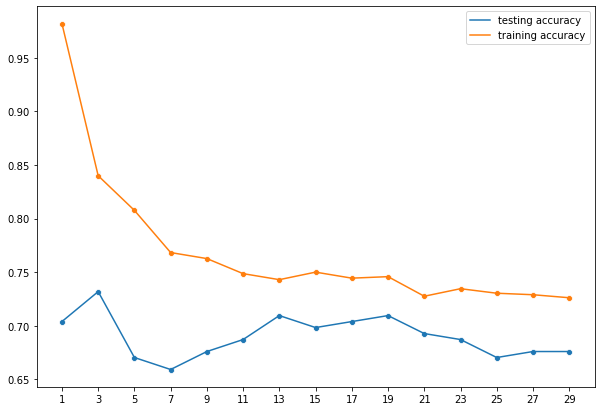

In [78]:
plt.figure(figsize=(10,7))
sns.lineplot(k,testing_accuracy)
sns.scatterplot(k,testing_accuracy)

sns.lineplot(k,training_accuracy)
sns.scatterplot(k,training_accuracy)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k))
plt.show()

In [79]:
best_k,score

(3, 0.7318435754189944)

In [80]:
# with scaling

scaler= MinMaxScaler()
scaler.fit(X_train) #fitting dengan data train
X_train_scaled= scaler.transform(X_train) 
X_test_scaled= scaler.transform(X_test)

In [81]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8
0,0.673285,0.000000,0.027326,1.0,1.0,1.0,0.0,0.0,1.0
1,0.271174,0.000000,0.017567,1.0,1.0,0.0,1.0,0.0,1.0
2,0.359135,0.000000,0.015127,1.0,1.0,0.0,1.0,1.0,0.0
3,0.367921,0.000000,0.059532,1.0,1.0,0.0,0.0,0.0,1.0
4,0.497361,0.166667,0.030254,0.0,1.0,0.0,1.0,1.0,0.0


In [82]:
k= range(1,30,2) #1,3,5,7,....29
testing_accuracy=[]
training_accuracy=[]
score=0

for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)

    y_predict_train=knn.predict(X_train_scaled)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))

    y_predict_test= knn.predict(X_test_scaled)
    acc_score= accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)

    if score < acc_score:
        score=acc_score
        best_k=i

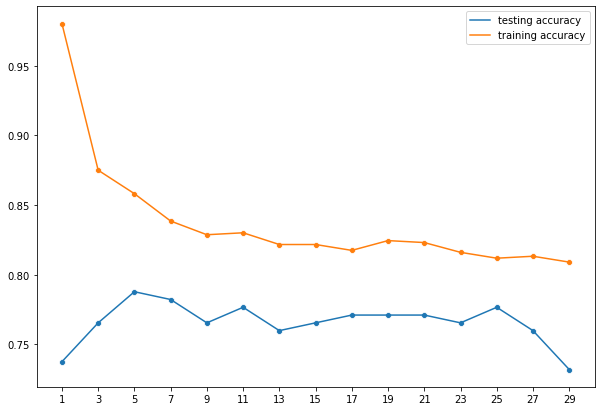

In [83]:
plt.figure(figsize=(10,7))
sns.lineplot(k,testing_accuracy)
sns.scatterplot(k,testing_accuracy)

sns.lineplot(k,training_accuracy)
sns.scatterplot(k,training_accuracy)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k))
plt.show()

In [84]:
best_k,score

(5, 0.7877094972067039)

# Desicion Tree Classifier

In [86]:
wine=pd.read_csv('white_wine.csv')

In [87]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

In [102]:
X=wine[['alcohol','density']]
y=[1 if i>6 else 0 for i in wine['quality']]

In [103]:
X['alcohol'].fillna(X['alcohol'].mean(),inplace=True)

In [104]:
X.isna().sum()

alcohol    0
density    0
dtype: int64

In [105]:
X_train,X_test,y_train,y_test= train_test_split(
    X,y,
    stratify=y,
    test_size=0.2,
    random_state=2020
)

In [106]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Without Scaling

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
tree=DecisionTreeClassifier(criterion='gini',max_depth=2)

In [121]:
X_train

,alcohol,density
325,10.5,0.9946
273,9.0,0.9949
287,9.0,1.0029
342,9.1,0.9962
323,10.4,0.9946
...,...,...
382,9.2,0.9969
426,10.4,0.9954
489,8.9,0.9962
311,12.5,0.9968


In [122]:
tree.fit(X_train,y_train)
y_predict=tree.predict(X_test)

In [123]:
print('accuracy: ', accuracy_score(y_test,y_predict))

accuracy:  0.9519230769230769


In [124]:
from sklearn.tree import plot_tree

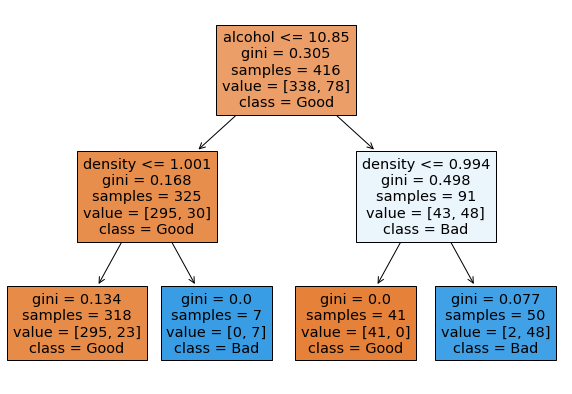

In [127]:
plt.figure(figsize=(10,7))
plot_tree(tree, feature_names= list(X), class_names=['Good','Bad'],filled=True)
plt.show()

In [114]:
## With scaling

In [115]:
tree=DecisionTreeClassifier(criterion='gini', max_depth=2)
tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=2)

In [116]:
y_predict=tree.predict(X_test_scaled)
accuracy_score(y_test,y_predict)

0.9519230769230769

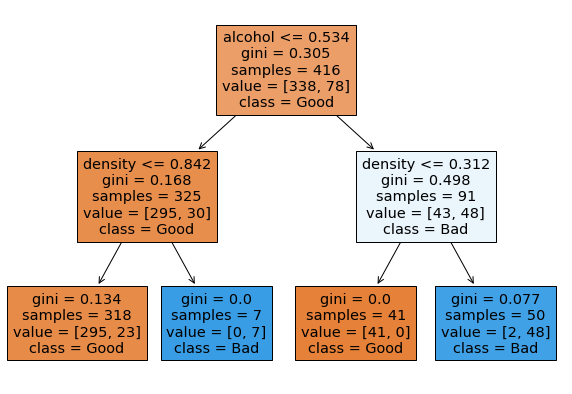

In [118]:
plt.figure(figsize=(10,7))
plot_tree(tree, feature_names= list(X), class_names=['Good','Bad'],filled=True)
plt.show()

Pada decision tree, scaling tidak memiliki pengaruh terhadap performa model

Tapi, setelah scaling, intepretasi pohon menjadi lebih sulit dimengerti.

https://towardsdatascience.com/data-leakage-in-machine-learning-10bdd3eec742#  
https://en.wikipedia.org/wiki/E_(mathematical_constant  
https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#  
https://towardsdatascience.com/understanding-decision-tree-classifier-7366224e033b